In [1]:
import cv2
import numpy as np
import os
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from scipy.cluster.vq import vq
import joblib
# from skimage import io
# from PIL import Image 
import matplotlib.pyplot as plt


(63, 128)


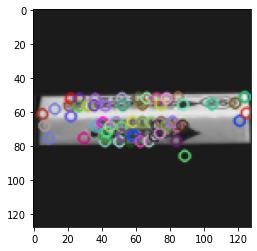

In [6]:
# Test SIFT detector
img = cv2.imread('/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__0.png')   #đọc ảnh
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # chuyển ảnh sang hệ gray

sift = cv2.SIFT_create(128) #khởi tạo đối tượng sift

kp, des = sift.detectAndCompute(img,None)   #Đối tượng này có phương thức detectAndCompute trả về 2 outputs kp và des, kp là một list chứa các keypoints được detect bởi SIFT, des là một numpy array chứa len(kp) vectors 128 chiều.
print(des.shape)  

img=cv2.drawKeypoints(gray,kp,img)
plt.imshow(img)

In [4]:
clf, classes_names, stdSlr, k, voc = joblib.load(
    "/home/darkknight/computer-vision/sift500_coil100_svm.pkl")

In [5]:
test_path = '/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test'

image_paths = []
image_classes = []
class_id = 0

In [6]:
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]


for class_name in classes_names:
    dir = os.path.join(test_path, class_name)
    class_path = imglist(dir)
    image_paths += class_path
    image_classes += [class_id] * len(class_path)
    class_id += 1
des_list = []

In [7]:
sift = cv2.SIFT_create(128)

In [8]:
for image_path in image_paths:
    im = cv2.imread(image_path)
    # im = cv2.resize(im, (150,150))
    kpts, des = sift.detectAndCompute(im, None)
    des_list.append((image_path, des))

In [30]:
des_list[0]

('/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__0.png',
 array([[16.,  0.,  0., ...,  0.,  0.,  0.],
        [66., 17.,  0., ...,  0.,  4.,  3.],
        [ 1.,  0.,  0., ..., 15.,  0.,  1.],
        ...,
        [ 0.,  0.,  0., ...,  1.,  1.,  5.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [30., 88.,  1., ..., 32.,  1.,  0.]], dtype=float32))

In [10]:
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    if des_list[i][1] is not None:
        words, distance = vq(des_list[i][1], voc)
        for w in words:
            test_features[i][w] += 1
test_features = stdSlr.transform(test_features)

In [11]:
pred = clf.predict(test_features)
accuracy = accuracy_score(image_classes, pred)
report = classification_report(image_classes, pred)
print(accuracy)

0.9721428571428572


In [12]:
image_paths[0]

'/home/darkknight/computer-vision/object-detection/data_process/coil-100-BOW/test/obj67/obj67__0.png'

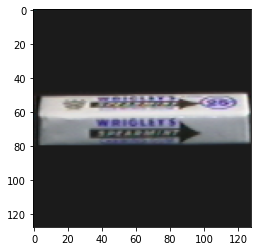

In [15]:
img = cv2.imread(image_paths[0], cv2.IMREAD_COLOR)
# cv2.imshow("image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)

In [29]:
classes_names[0]

'obj67'

In [31]:
image_classes[0]

0

In [32]:
pred[0]

0

In [24]:
accuracy = accuracy_score(image_classes, pred)
accuracy

0.9721428571428572